## us6000b26j

M 6.3 - western Xizang

2020-07-22 20:07:19 (UTC)

33.144°N 86.864°E

10.0 km depth

### Imports

In [1]:
from cioppy import Cioppy
import requests
import json
import datetime
from shapely.wkt import loads
from helpers import *
import matplotlib.pyplot as plt
from PIL import Image

In [2]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

## USGS API 

Get information about the event using the USGS API

In [3]:
usgs_api = 'https://earthquake.usgs.gov/fdsnws/event/1/query' 

Set the event id:

In [4]:
eq_id = 'us6000b26j'

In [5]:
payload = {'eventid': eq_id,
           'format': 'geojson'}
        
r = requests.get(usgs_api, params = payload)

r.status_code

200

In [6]:
record = json.loads(r.content.decode('utf-8'))

Check if the event has a shakemap

In [7]:
'shakemap' in record['properties']['types'].split(',')

True

A Python class for the event to ease accessing the information 

In [8]:
class EarthQuake:
    
    def __init__(self, record):
    
        self.wkt = 'POINT({} {})'.format(record['geometry']['coordinates'][0], 
                                         record['geometry']['coordinates'][1])
        
        self.depth = record['geometry']['coordinates'][2]
        
        self.date = datetime.datetime.fromtimestamp(record['properties']['time'] /1000.0).isoformat() + 'Z'
        
        self.updated = datetime.datetime.fromtimestamp(record['properties']['updated'] /1000.0).isoformat() + 'Z'
        
        self.url = str(record['properties']['url'])
        
        self.title = str(record['properties']['title'])

        try:
            self.abstract = self.title + '. ' + str(record['properties']['products']['impact-text'][0]['contents']['']['bytes']).rstrip()
        except:
            self.abstract = self.title
            
        self.id = str(record['id'])
        
        self.quakeml = requests.get('https://earthquake.usgs.gov/fdsnws/event/1/query?eventid={}&format=quakeml'.format(self.id)).content

        if 'shakemap' in record['properties']['types'].split(','):
            
            # Intensity Contours - Contours of macroseismic intensity.
            self.mmi = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_mmi.json']['url']).content.decode('utf-8'))
            
            # Intensity Contours (Legacy Naming) - Contours of macroseismic intensity.
            self.mi = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_mi.json']['url']).content.decode('utf-8'))
            
            # PGA Contours - Contours of GREATER_OF_TWO_HORIZONTAL peak ground acceleration (%g).
            self.pga = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_pga.json']['url']).content.decode('utf-8'))
            
            # PGV Contours - Contours of GREATER_OF_TWO_HORIZONTAL peak ground velocity (cm/s).            
            self.pgv = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_pgv.json']['url']).content.decode('utf-8'))
            
            # SA(0.3) Contours - Contours of GREATER_OF_TWO_HORIZONTAL 5% damped 0.3 sec spectral acceleration (%g).
            self.psa0p3 = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_psa0p3.json']['url']).content.decode('utf-8'))
            
            # SA(1.0) Contours - Contours of GREATER_OF_TWO_HORIZONTAL 5% damped 1.0 sec spectral acceleration (%g).
            self.psa1p0 = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_psa1p0.json']['url']).content.decode('utf-8'))
            
            # SA(3.0) Contours - Contours of GREATER_OF_TWO_HORIZONTAL 5% damped 3.0 sec spectral acceleration (%g).
            self.psa3p0 = json.loads(requests.get(record['properties']['products']['shakemap'][0]['contents']['download/cont_psa3p0.json']['url']).content.decode('utf-8'))
            


In [9]:
eq = EarthQuake(record)

Access the event peak ground velocity

In [10]:
eq.pgv

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'value': 0.2,
    'units': 'cms',
    'color': '#a7dfff',
    'weight': 4},
   'geometry': {'type': 'MultiLineString',
    'coordinates': [[[89.802536, 37.6],
      [89.804299, 37.581731],
      [89.870865, 37.569819],
      [89.917463, 37.6]],
     [[90.165941, 37.583364], [90.153768, 37.576901], [90.165941, 37.583364]],
     [[90.483472, 37.383727],
      [90.486596, 37.426039],
      [90.403389, 37.508677],
      [90.187051, 37.539939],
      [90.17041, 37.562006],
      [90.153768, 37.556254],
      [90.134016, 37.516818],
      [90.153768, 37.479806],
      [90.297414, 37.417],
      [90.320182, 37.418917],
      [90.370106, 37.389848],
      [90.436672, 37.374309],
      [90.483472, 37.383727]],
     [[91.795343, 37.267273],
      [91.81169, 37.283909],
      [91.803203, 37.317182],
      [91.74868, 37.367091],
    

## Discover the data pipeline data items

The data pipeline processess the Sentinel-1 SLC pairs with DIAPASON and DLR's InSAR-Browse

The entry point to access these products is the set of the data processing pipelines data items in 'out' status

In [11]:
search_params = {}

search_params['cat'] = '[{},dataitem,out]'.format(eq_id)
search_params['count'] = '100'

In [12]:
ciop = Cioppy()

In [13]:
data_items = ciop.search(end_point='https://catalog.terradue.com/gep-usgs-pager-0001/search', 
                         params=search_params,
                         output_fields='identifier,title')

In [14]:
data_items

[{'identifier': 'd4c4347e2dc7849f77b2ce50710aff47',
  'title': '[DI Out] DIAPASON coseismic pair [master:2020-07-18T12:15:28.1450000Z/slave:2020-07-30T12:15:29.0410000Z]'},
 {'identifier': '24822f1becd6677b87fdfeeb5bd82b8d',
  'title': '[DI Out] DIAPASON coseismic pair [master:2020-07-13T00:17:10.2050000Z/slave:2020-07-25T00:17:10.9200000Z]'}]

### Discover the results produced by the data items

In [15]:
results = []

for data_item in data_items: 
    
    print(data_item['identifier'])
    
    search_params = {}

    search_params['uid'] = data_item['identifier']
    
    data_item_results  = ciop.search(end_point='https://catalog.terradue.com/gep-usgs-pager-0001/search', 
                                     params=search_params,
                                     output_fields='link:results')
    
    search_results = ciop.search(end_point=data_item_results[0]['link:results'], 
                     params={},
                     output_fields='title,startdate,enddate,enclosure')
    
    for result in search_results:
        
        # get only the DIAPASON results:
        if 'DIAPASON' in result['title']:
            
            results.append({'title': result['title'], 
                            'enclosure': result['enclosure'], 
                            'type': 'data'})
            
            # add the RGB composites 
            results.append({'title': result['title'], 
                            'enclosure': result['enclosure'].replace('.tiff', '.rgb.tiff'),
                            'type': 'rgb'})

d4c4347e2dc7849f77b2ce50710aff47
24822f1becd6677b87fdfeeb5bd82b8d


In [16]:
results

[{'title': 'DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Amplitude - 2020-07-18T12:15:28 2020-07-30T12:15:29',
  'enclosure': 'https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/8597bf68-0bf4-11eb-9f32-0242ac110002/0011537-200723125048137-oozie-oozi-W/amp_33509_33684_ortho.tiff',
  'type': 'data'},
 {'title': 'DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Amplitude - 2020-07-18T12:15:28 2020-07-30T12:15:29',
  'enclosure': 'https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/8597bf68-0bf4-11eb-9f32-0242ac110002/0011537-200723125048137-oozie-oozi-W/amp_33509_33684_ortho.rgb.tiff',
  'type': 'rgb'},
 {'title': 'DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Coherence - 2020-07-18T12:15:28 2020-07-30T12:15:29',
  'enclosure': 'https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazard

## Plot the phase

Create a bounding box around the event centre

In [17]:
bbox = list(loads(eq.wkt).buffer(0.5).bounds)

bbox

[86.3637, 32.6438, 87.3637, 33.6438]

DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Amplitude - 2020-07-18T12:15:28 2020-07-30T12:15:29 https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/8597bf68-0bf4-11eb-9f32-0242ac110002/0011537-200723125048137-oozie-oozi-W/amp_33509_33684_ortho.tiff
(2400, 2400, 1)
DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Amplitude - 2020-07-18T12:15:28 2020-07-30T12:15:29 https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/8597bf68-0bf4-11eb-9f32-0242ac110002/0011537-200723125048137-oozie-oozi-W/amp_33509_33684_ortho.rgb.tiff
(2400, 2400, 2)
DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Coherence - 2020-07-18T12:15:28 2020-07-30T12:15:29 https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/8597bf68-0bf4-11eb-9f32-0242ac110002/0011537-

/opt/anaconda/envs/env_better/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


(2400, 2400, 4)
DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Unwrapped Phase - 2020-07-18T12:15:28 2020-07-30T12:15:29 https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/8597bf68-0bf4-11eb-9f32-0242ac110002/0011537-200723125048137-oozie-oozi-W/unw_33509_33684_ortho.tiff
(2400, 2400, 1)
DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Unwrapped Phase - 2020-07-18T12:15:28 2020-07-30T12:15:29 https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/8597bf68-0bf4-11eb-9f32-0242ac110002/0011537-200723125048137-oozie-oozi-W/unw_33509_33684_ortho.rgb.tiff
(2400, 2400, 4)
DIAPASON InSAR Sentinel-1 TOPSAR(IW,EW) - Interferometric Phase - 2020-07-18T12:15:28 2020-07-30T12:15:29 https://store.terradue.com/gep-usgs-pager-0001/_results/workflows/geohazards_tep_dcs_insar_diapason_s1_dcs_diapason_s1_1_1_8/run/8597bf68-0bf4-11eb-9f32-0242ac110002/0011537-20072312

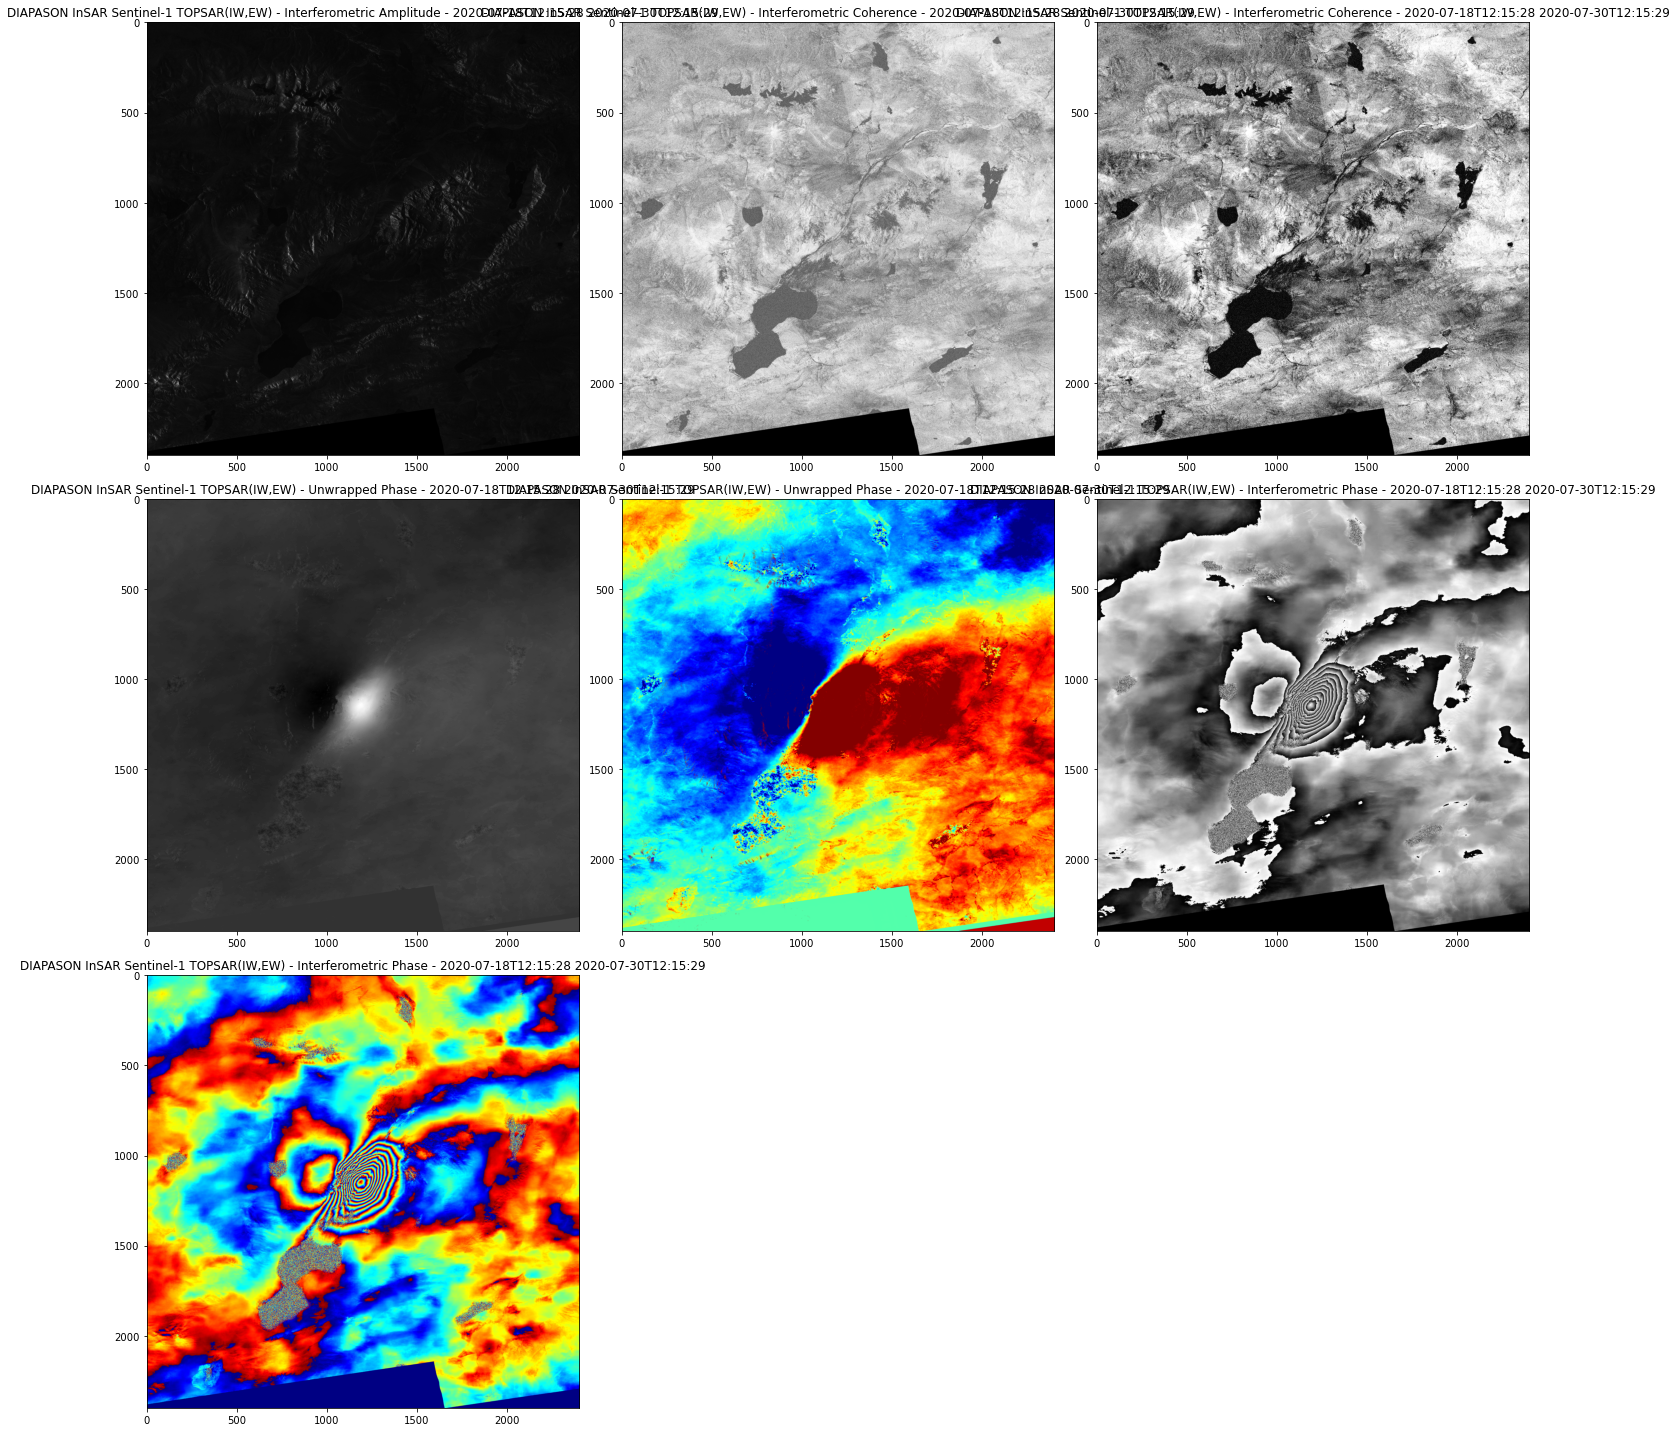

In [25]:
fig = plt.figure(figsize=(20,20))

i=1
for index, result in enumerate(results):

    print (result['title'], result['enclosure'])
    
    img_data = vsi_download(enclosure=result['enclosure'],
                            bbox=bbox)
    
    print(img_data.shape)
    a=fig.add_subplot(3, 3, 0+i)
    a.set_title(result['title'])
    width = 12
    height = 12
   
    if img_data.shape[2] == 4:
        
        data = np.dstack((img_data[:,:,0], 
                          img_data[:,:,1],
                          img_data[:,:,2])).astype(np.uint8) 

        img = Image.fromarray(data)
        imgplot = plt.imshow(img)

    elif img_data.shape[2] == 2:
        
        continue  
    
    else:
        
        data = img_data
    
        imgplot = plt.imshow(data.reshape(data.shape[0],
                                          data.shape[1]), 
                             cmap=plt.cm.gray) 

    i = i+1
    
    # stop plotting the results after a few images
    if i == 8: break   
        
plt.tight_layout()
fig = plt.gcf()
plt.show()

fig.clf()
plt.close()